In [1]:
import keras 
import matplotlib.pyplot  as plt 
import pandas as pd 
import numpy as np
import seaborn as sns

## **Load Data**

In [2]:
df = pd.read_csv('Data/Rice_Cammeo_Osmancik.csv')

## **Describe Data**

In [3]:
print(df.describe())

               Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144753         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0

<Axes: >

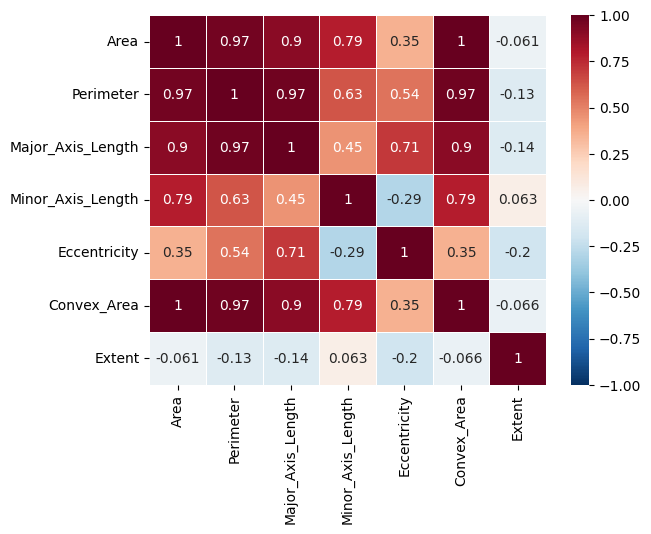

In [4]:
column_number = df.select_dtypes(include=['int64' , 'float64']).columns.to_list()
CorrelationMatrice = df[column_number].corr()

sns.heatmap(CorrelationMatrice , vmin=-1 , vmax=1 , cmap='RdBu_r' , linewidths=0.5 , linecolor='white' , annot=True)

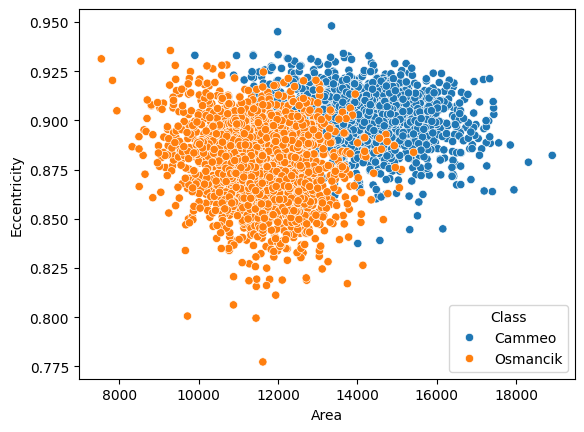

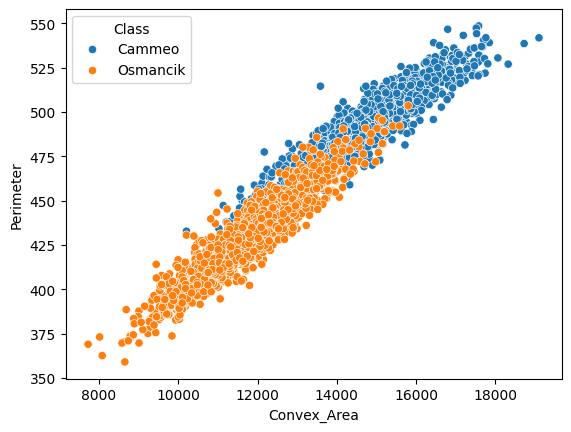

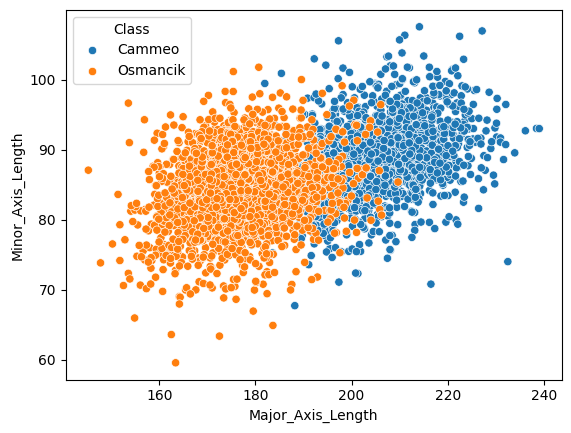

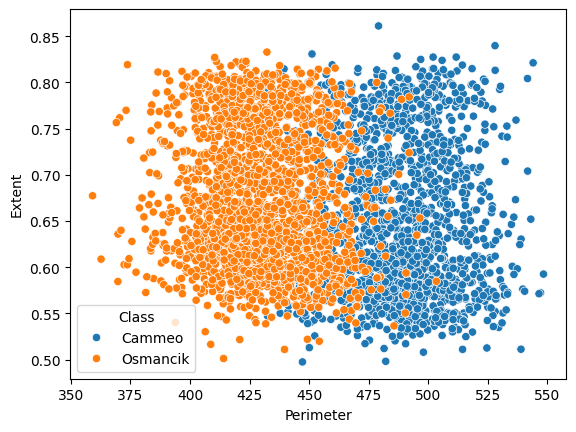

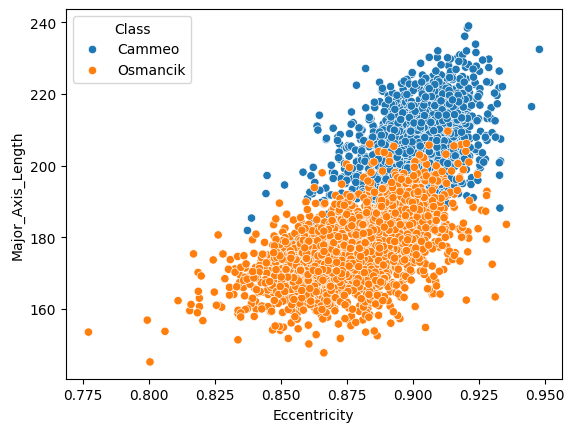

In [5]:
for x_axis_data, y_axis_data in [
    ('Area', 'Eccentricity'),
    ('Convex_Area', 'Perimeter'),
    ('Major_Axis_Length', 'Minor_Axis_Length'),
    ('Perimeter', 'Extent'),
    ('Eccentricity', 'Major_Axis_Length'),
]: sns.scatterplot(df, x=x_axis_data, y=y_axis_data , hue='Class' ) , plt.show()

## Normalize the Data 

In [6]:
feature_mean = df.mean(numeric_only=True)
feature_std = df.std(numeric_only=True)
data_normalized = (df[column_number] - feature_mean)/ feature_std



In [7]:
data_normalized['Class_bool'] = (df['Class'] == 'Cammeo').astype('int')
print(data_normalized)

          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     1.479635   2.004091           2.348238          -0.212915      2.018073   
1     1.147720   1.125705           0.988261           0.945444      0.409964   
2     1.135020   1.317041           1.451718           0.253854      1.212797   
3     0.293398   0.115285           0.261405           0.198025      0.239720   
4     1.166191   1.486858           1.316269           0.523351      0.952096   
...        ...        ...                ...                ...           ...   
3805 -0.708122  -1.078211          -1.048185          -0.097238     -1.085140   
3806 -0.601909  -0.922805          -1.207050           0.549550     -1.970472   
3807 -0.133186  -0.329808          -0.298206           0.085208     -0.275063   
3808 -1.608046  -1.740092          -1.580764          -1.414228     -0.598743   
3809 -0.712163  -1.391383          -1.587338           0.794867     -2.938774   

      Convex_Area    Extent

In [8]:
countData = len(data_normalized)
index_train = round(countData * 0.8)
index_test = round(countData * 0.1)

shuffled_data = data_normalized.sample(frac=1 ,  random_state=100)

train_data = shuffled_data[:index_train]
test_data = shuffled_data[index_train:index_test]
validation_data = shuffled_data[index_test:]

In [9]:
train_feature = train_data.drop(columns='Class_bool')
train_label = train_data['Class_bool'].to_numpy()
validation_feature = validation_data.drop(columns='Class_bool')
validation_label = validation_data['Class_bool'].to_numpy()
test_feature = test_data.drop(columns='Class_bool')
test_label = test_data['Class_bool'].to_numpy()

In [10]:
## name of feature will train our model on 
input_feature = [ 'Eccentricity',
    'Major_Axis_Length',
    'Area']

In [12]:
def build_model(feature , learning_rate) : 
    input_features = 3  
    model = keras.models.Sequential([
        keras.layers.Dense(1, input_shape=(input_features,), activation='sigmoid')  
    ])
    model.compile(
        optimizer='adam',              
        loss='binary_crossentropy',     
        metrics=['accuracy']          
    )  
    return model


def train_model(model , dataset , feature_names , label) :
    X = dataset[feature_names].values
    print(X)
    print('label' , label)
    history = model.fit(
      x=X,
      y=label,
     epochs=20, batch_size=32
    )
    return history

model = train_model(build_model(3, 0.01) , train_data  , input_feature  , train_label )


c:\Users\eddaoudi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[[-0.27498574 -1.8219906  -2.07676901]
 [-0.11187608 -0.51362218 -0.58285984]
 [ 1.54661552  1.36368945  0.69458259]
 ...
 [-0.2156177  -0.1602141  -0.07373005]
 [ 0.44009359 -0.32814083 -0.66078787]
 [-1.41579426 -0.55281881  0.0717356 ]]
label [0 0 1 ... 0 0 0]
Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0880 - loss: 1.2172
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0995 - loss: 1.0633
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1277 - loss: 0.9247
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1970 - loss: 0.8131
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5340 - loss: 0.7158
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6486 - loss: 0.6369
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.5718
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9092 - loss: 0.5177
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.

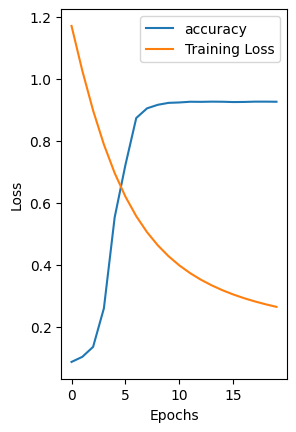

In [19]:
plt.subplot(1 ,2 ,2)
plt.plot(model.history['accuracy'] , label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()



plt.plot(model.history['loss'] , label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()